### Bootstrap

Bootstrap es una idea loca que surgió en los 80's que consiste en reaamplear con remplazo


In [1]:
# Importar liberias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### Procedimiento: bootstrap resampling

1- Crea muchas muestras con remplazo y obten una metrica (promedio, desviación, AUC, lo que sea)

2- Guarda esa métrica en una lista

3- Esa lista te dará la distribución real de la variable aleatoria




## Aplicación : Intervalos de confianza para las market betas

In [2]:
# Get tickers 
import yfinance as yf
tickers = ['VTI', 'AMZN', 'AAPL']
start_date = '2015-01-01'

# Descargar precios y graficar
St = yf.download(tickers, start=start_date)['Close']

returns = St.pct_change().dropna()
returns.head()

[*********************100%%**********************]  3 of 3 completed


,AAPL,AMZN,VTI
Date,,,
2015-01-05,-0.028172,-0.020517,-0.017183
2015-01-06,0.000094,-0.022833,-0.009798
2015-01-07,0.014022,0.010600,0.011932
2015-01-08,0.038422,0.006836,0.017640
2015-01-09,0.001073,-0.011749,-0.008290




Calcular beta con una regresión:
$$r_{vgt} = \beta_o + \beta_1 * r_{vti}$$

In [3]:
# Calcular beta del activo 
from sklearn.linear_model import LinearRegression
X = returns[['VTI']]
Y = returns[['AMZN']]
model = LinearRegression().fit(X,Y)
model.coef_[0][0]

1.1105813030620613

In [4]:
returns

,AAPL,AMZN,VTI
Date,,,
2015-01-05,-0.028172,-0.020517,-0.017183
2015-01-06,0.000094,-0.022833,-0.009798
2015-01-07,0.014022,0.010600,0.011932
2015-01-08,0.038422,0.006836,0.017640
2015-01-09,0.001073,-0.011749,-0.008290
...,...,...,...
2023-11-09,-0.002625,-0.010417,-0.008514
2023-11-10,0.021874,0.021053,0.014888
2023-11-13,-0.008584,-0.006757,-0.000598


In [5]:
# Calcule bootstrap de las betas
n = 1500
betas = []

for i in range(n): 
    flag_df = returns.sample(len(returns), replace = True)
    model = LinearRegression()
    X = flag_df[['VTI']]
    y = flag_df[['AMZN']]
    model.fit(X, y)
    beta_bootstrap = model.coef_[0][0]
    betas.append(beta_bootstrap) 

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  4.,  6.,  8., 24., 14.,
        27., 31., 32., 39., 53., 50., 53., 59., 73., 75., 65., 81., 68.,
        63., 80., 67., 74., 58., 68., 60., 49., 41., 29., 31., 25., 17.,
        23., 12.,  5., 11.,  4.,  7.,  3.,  3.,  0.,  0.,  4.]),
 array([0.91366879, 0.92144865, 0.92922852, 0.93700838, 0.94478825,
        0.95256812, 0.96034798, 0.96812785, 0.97590771, 0.98368758,
        0.99146745, 0.99924731, 1.00702718, 1.01480704, 1.02258691,
        1.03036678, 1.03814664, 1.04592651, 1.05370637, 1.06148624,
        1.06926611, 1.07704597, 1.08482584, 1.0926057 , 1.10038557,
        1.10816544, 1.1159453 , 1.12372517, 1.13150503, 1.1392849 ,
        1.14706477, 1.15484463, 1.1626245 , 1.17040436, 1.17818423,
        1.1859641 , 1.19374396, 1.20152383, 1.20930369, 1.21708356,
        1.22486343, 1.23264329, 1.24042316, 1.24820302, 1.25598289,
        1.26376276, 1.27154262, 1.27932249, 1.28710235, 1.29488222,
        1.30266209]),
 <BarContainer

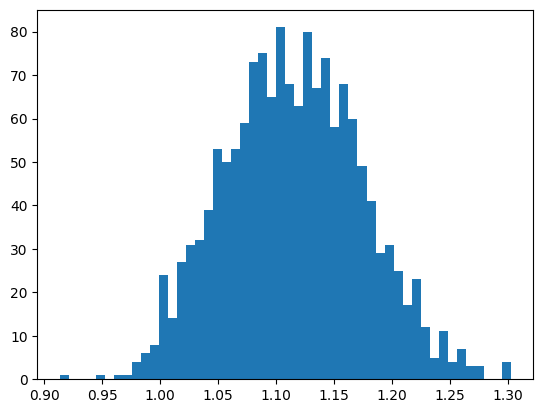

In [6]:
# Histograma de las betas
plt.hist(betas, bins = 50)

¿Cuál es la probabilidad de que el beta sea menor a 0?

In [7]:
df = pd.DataFrame()
df['betas'] = betas
np.mean(df.betas < 0 )

0.0

Probabilidad que la beta sea mayor a 1.1

In [8]:
np.mean(df.betas > 1.1) 

0.5913333333333334

## Con las betas anteriores, calcula el CAPM 


rf = 4%

mercado = 9%

$$E[r_i] = rf + \beta * (E[m] - rf) $$

In [9]:
betas_oficial = np.mean(betas) 

In [10]:
# Simula el CAPM con todas las betas del bootstrap

# CAPM es una mejor manera de estimar un promdio a largo plazo 

rf = 0.04 
mercado = 0.09

rf + betas_oficial * (mercado - rf) 

0.09576184195198308

In [11]:
# Probabilidad de rendimiento esperado menor a 9%
df['capm'] = rf + df.betas * (mercado - rf) 

In [12]:
# Probabilidad de rendimiento esperado menor a 10%
np.mean(df.capm < 0.1) 

0.92

In [13]:
np.mean(df.capm < 0.09)

0.016666666666666666

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  4.,  6.,  8., 24., 14.,
        27., 31., 32., 39., 53., 50., 53., 59., 73., 75., 65., 81., 68.,
        63., 80., 67., 74., 58., 68., 60., 49., 41., 29., 31., 25., 17.,
        23., 12.,  5., 11.,  4.,  7.,  3.,  3.,  0.,  0.,  4.]),
 array([0.08568344, 0.08607243, 0.08646143, 0.08685042, 0.08723941,
        0.08762841, 0.0880174 , 0.08840639, 0.08879539, 0.08918438,
        0.08957337, 0.08996237, 0.09035136, 0.09074035, 0.09112935,
        0.09151834, 0.09190733, 0.09229633, 0.09268532, 0.09307431,
        0.09346331, 0.0938523 , 0.09424129, 0.09463029, 0.09501928,
        0.09540827, 0.09579727, 0.09618626, 0.09657525, 0.09696424,
        0.09735324, 0.09774223, 0.09813122, 0.09852022, 0.09890921,
        0.0992982 , 0.0996872 , 0.10007619, 0.10046518, 0.10085418,
        0.10124317, 0.10163216, 0.10202116, 0.10241015, 0.10279914,
        0.10318814, 0.10357713, 0.10396612, 0.10435512, 0.10474411,
        0.1051331 ]),
 <BarContainer

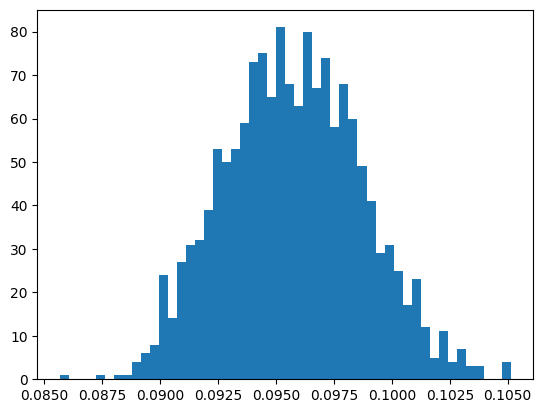

In [14]:
plt.hist(df.capm, bins = 50) 

### Mezclando dos simulaciones

In [15]:
import random 
random.choice([0, 1]) 

0

(array([ 4.,  5.,  4., 18., 34., 49., 61., 56., 72., 55., 54., 41., 34.,
        26., 23., 30., 33., 45., 48., 49., 62., 56., 46., 38., 29., 29.,
        32., 37., 35., 47., 38., 46., 51., 43., 44., 29., 20., 21., 18.,
        10., 11.,  7.,  5.,  1.,  3.,  0.,  0.,  0.,  0.,  1.]),
 array([0.07774454, 0.07867292, 0.0796013 , 0.08052967, 0.08145805,
        0.08238643, 0.08331481, 0.08424319, 0.08517156, 0.08609994,
        0.08702832, 0.0879567 , 0.08888508, 0.08981345, 0.09074183,
        0.09167021, 0.09259859, 0.09352696, 0.09445534, 0.09538372,
        0.0963121 , 0.09724048, 0.09816885, 0.09909723, 0.10002561,
        0.10095399, 0.10188237, 0.10281074, 0.10373912, 0.1046675 ,
        0.10559588, 0.10652425, 0.10745263, 0.10838101, 0.10930939,
        0.11023777, 0.11116614, 0.11209452, 0.1130229 , 0.11395128,
        0.11487966, 0.11580803, 0.11673641, 0.11766479, 0.11859317,
        0.11952154, 0.12044992, 0.1213783 , 0.12230668, 0.12323506,
        0.12416343]),
 <BarContainer

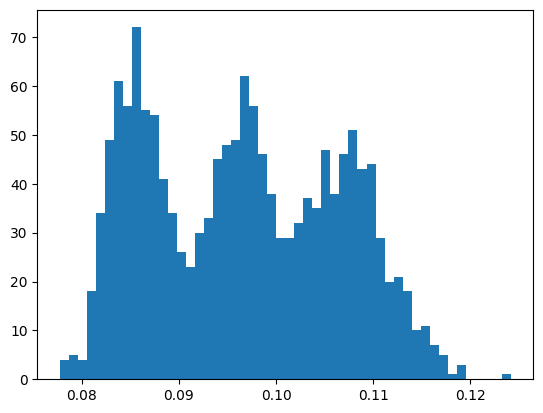

In [16]:
### Rf puede tomar distintos valores, 3%, 2% y 4%
### El rendimiento de mercado ronda entre 8% y 10%, simular con estas distintas alternativas

n = 1500
capm = []

for i in range(n): 
    flag_df = returns.sample(len(returns), replace = True)
    model = LinearRegression()
    X = flag_df[['VTI']]
    y = flag_df[['AMZN']]
    model.fit(X, y)
    beta = model.coef_[0][0] 
    rf = random.choice([0.02, 0.03, 0.04])
    mercado = random.choice([0.08, 0.09, 0.10])
    capm_bootstrap = rf + beta * ( mercado - rf) 
    capm.append(capm_bootstrap)


plt.hist(capm, bins = 50)
    

In [17]:
# Probabiliad que sea mayor a 11% 
df = pd.DataFrame()
df['capm'] = capm 
np.mean(df.capm > 0.11) 

0.092

### ¿Qué tan buena es la beta para escoger acciones?

#### ¿Será que lo que importa en realidad es la beta que tiene un activo? 

Es decir, ¿si el mercado funciona así?

- *Lo único que importa es el riesgo*
- *Más riesgo es más rendimiento y el riesgo tiene que ver con el riesgo de mercado*


In [18]:
# Calcular beta del activo 
model = LinearRegression() 
X = returns[['VTI']]
y = returns[['AAPL']]
model.fit(X, y) 
model.coef_ 

array([[1.17257866]])

In [19]:
# Prediiga usando el modelo
predicciones = model.predict(X) 


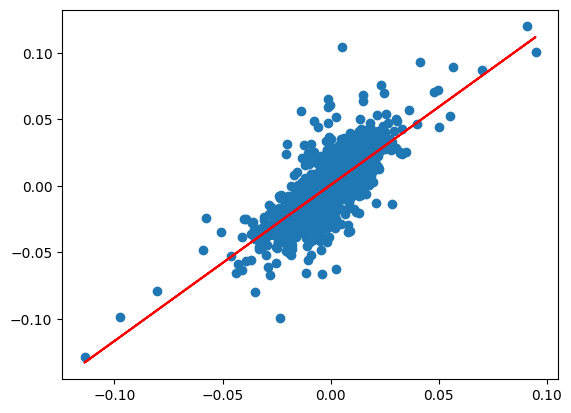

In [20]:
# Grafique regresion
plt.scatter(returns.VTI, returns.AAPL) 
plt.plot(returns.VTI, predicciones, color = 'red') 

In [21]:
# Si la r2 es alta, tu beta es el riesgo 
# Si tu r2 es baja, la beta no es el riesgo 


$$ R^2 = \frac{Var(x_{mean}) - Var(x_{model})}{Var(x_{model})} $$

In [22]:
# Calcule el R2 con sklearn
from sklearn.metrics import r2_score
r2_score(y_true = y, y_pred = predicciones) 

0.5567702403559083

In [23]:
# Doble bootstrap, betas y R2
n = 1500
betas = []
r2 = []


for i in range(n): 
    flag_df = returns.sample(len(returns), replace = True)
    model = LinearRegression()
    X = flag_df[['VTI']]
    y = flag_df[['AAPL']]
    model.fit(X, y)
    beta_bootstrap = model.coef_[0][0]
    betas.append(beta_bootstrap) 

#
    predicciones = model.predict(X) 
    bootstrap_r2 = r2_score(y_pred = predicciones, y_true = y) 
    r2.append(bootstrap_r2)

(array([ 1.,  1.,  0.,  0.,  1.,  2.,  3.,  4.,  6.,  3.,  8., 16., 11.,
        14., 20., 25., 36., 49., 58., 47., 60., 79., 68., 64., 90., 94.,
        82., 83., 58., 78., 63., 58., 46., 52., 40., 39., 33., 23., 18.,
        12., 15., 17.,  6.,  6.,  4.,  2.,  1.,  1.,  0.,  3.]),
 array([0.46893888, 0.47228291, 0.47562695, 0.47897098, 0.48231502,
        0.48565905, 0.48900308, 0.49234712, 0.49569115, 0.49903519,
        0.50237922, 0.50572325, 0.50906729, 0.51241132, 0.51575536,
        0.51909939, 0.52244342, 0.52578746, 0.52913149, 0.53247553,
        0.53581956, 0.5391636 , 0.54250763, 0.54585166, 0.5491957 ,
        0.55253973, 0.55588377, 0.5592278 , 0.56257183, 0.56591587,
        0.5692599 , 0.57260394, 0.57594797, 0.57929201, 0.58263604,
        0.58598007, 0.58932411, 0.59266814, 0.59601218, 0.59935621,
        0.60270024, 0.60604428, 0.60938831, 0.61273235, 0.61607638,
        0.61942041, 0.62276445, 0.62610848, 0.62945252, 0.63279655,
        0.63614059]),
 <BarContainer

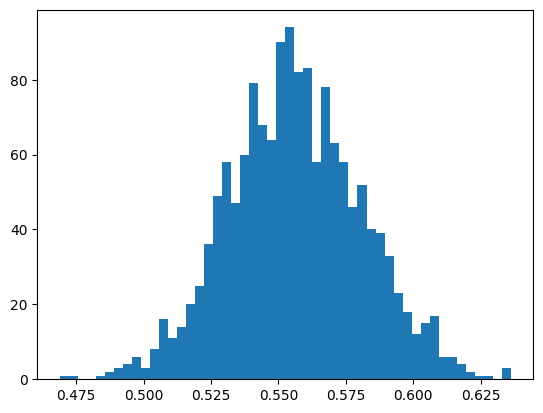

In [24]:
# Histograma del R2
df = pd.DataFrame() 
df['betas'] = betas 
df['r2'] = r2
plt.hist(df.r2, bins = 50)

(array([ 2.,  0.,  4.,  4.,  2.,  6., 11., 16.,  9., 12., 19., 29., 29.,
        32., 41., 54., 58., 77., 70., 64., 79., 75., 80., 89., 99., 54.,
        69., 66., 64., 39., 44., 32., 40., 27., 28., 21.,  8., 10.,  8.,
         7., 11.,  3.,  2.,  2.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([1.09114865, 1.09476184, 1.09837504, 1.10198824, 1.10560144,
        1.10921464, 1.11282783, 1.11644103, 1.12005423, 1.12366743,
        1.12728063, 1.13089383, 1.13450702, 1.13812022, 1.14173342,
        1.14534662, 1.14895982, 1.15257301, 1.15618621, 1.15979941,
        1.16341261, 1.16702581, 1.170639  , 1.1742522 , 1.1778654 ,
        1.1814786 , 1.1850918 , 1.18870499, 1.19231819, 1.19593139,
        1.19954459, 1.20315779, 1.20677099, 1.21038418, 1.21399738,
        1.21761058, 1.22122378, 1.22483698, 1.22845017, 1.23206337,
        1.23567657, 1.23928977, 1.24290297, 1.24651616, 1.25012936,
        1.25374256, 1.25735576, 1.26096896, 1.26458215, 1.26819535,
        1.27180855]),
 <BarContainer

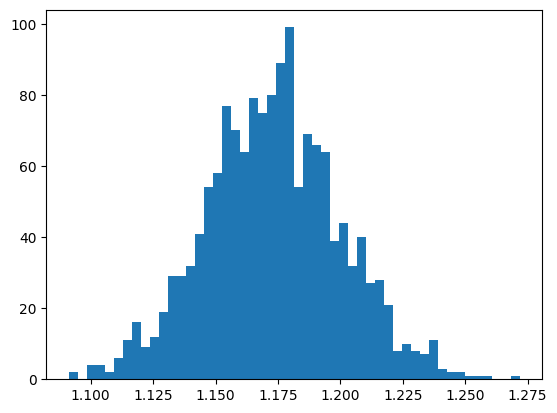

In [31]:
# Meta todo en un data frame
plt.hist(df.betas, bins = 50)

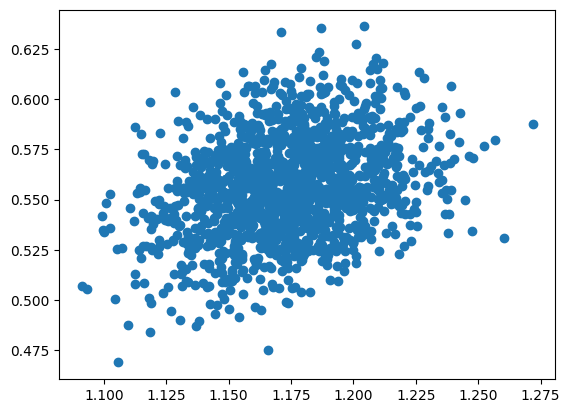

In [32]:
# Grafique la relación entre R2 y beta
plt.scatter(df.betas, df.r2)

### Probabilidad de que el 35% de la variación este explicado por el modelo 

In [33]:
np.mean(df.r2 > 0.35)

1.0

### Probabilidad de que el 45% de la variación este explicado por el modelo 

In [34]:
np.mean(df.r2 > 0.45)

1.0

In [35]:
np.mean(df.r2 > 0.55)

0.5986666666666667

# ¿Cuál sería la beta de un portafolio de 50% Amazon, 50% Apple?

In [36]:
# Crear portafolio
# Doble bootstrap, betas y R2

returns['apple_amazon'] = 0.5 * returns['AAPL'] + 0.5 * returns ['AMZN']
n = 1500
betas = []
r2 = []


for i in range(n): 
    flag_df = returns.sample(len(returns), replace = True)
    model = LinearRegression()
    X = flag_df[['VTI']]
    y = flag_df[['AAPL']]
    model.fit(X, y)
    beta_bootstrap = model.coef_[0][0]
    betas.append(beta_bootstrap) 

#
    predicciones = model.predict(X) 
    bootstrap_r2 = r2_score(y_pred = predicciones, y_true = y) 
    r2.append(bootstrap_r2)

In [37]:
df = pd.DataFrame()
df['r2'] = r2
df['betas'] = betas


In [28]:
# Calcular beta del activo 


<Axes: >

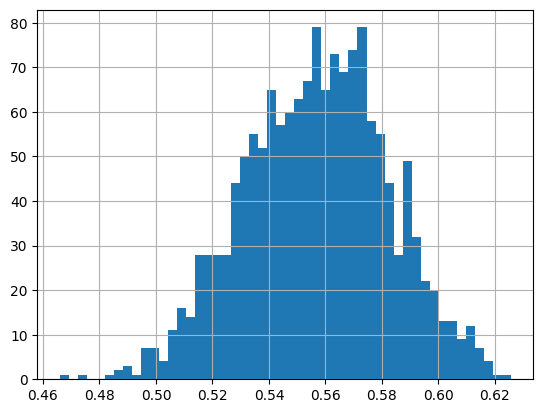

In [38]:
# Grafique el modelo
df.r2.hist(bins = 50)

In [39]:
# Probabilidad beta > 1.1 

np.mean(df.betas > 1.1)

0.9966666666666667

# ¿Cuál sería el R2?

In [30]:
# Calcular R2


# Pregunta: ¿qué creen que pase con el R2 a medida que agregamos más activos a un portafolio?